### ▶️ EDA

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pandas display behaviour
pd.set_option('display.max_columns', None)

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/RuralCreditData.csv')
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22.0,F,Mochi,Tailoring,Others,36000.0,5000.0,0.0,2.0,1.0,R,4.0,70.0,1.0,0.5,Apparels,12.0,12.0,5000.0
1,2,Manjapra,21.0,F,OBC,Tailoring,none,94000.0,3600.0,1.0,1.0,1.0,T1,4.0,80.0,1.0,0.5,Apparels,12.0,50.0,7500.0
2,3,Dhanbad,24.0,M,Nai,Beauty salon,Others,48000.0,4000.0,0.0,2.0,1.0,T1,4.0,50.0,1.0,0.5,Beauty Salon,12.0,12.0,5000.0
3,4,NaN,26.0,F,OBC,Tailoring,none,7000.0,5000.0,0.0,2.0,1.0,T1,5.0,50.0,1.0,0.5,Apparels,12.0,50.0,7500.0
4,5,Nuapada,23.0,F,OBC,General store,Agriculture,36000.0,3500.0,0.0,0.0,1.0,T1,1.0,112.0,1.0,0.5,Retail Store,12.0,12.0,5000.0


In [ ]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (10270, 21) | Rows: 10270, Columns: 21


**Initial Observations:**
1. Monthly_expenses=5000.0 and annual_income=7000.0 Seems like an interesting dataset already.
2. Looking at the values, there is a high possibility that value = value.lower() will reduce the unique values for a feature.

Let's check theory-2:

In [ ]:
for feature in list(df.columns):
    unique_count = len(set(df[feature].unique()))
    true_unique_count = len(set([str(x).lower() if isinstance(x, str) else x for x in df[feature].unique()]))

    if unique_count != true_unique_count:
        print(f'Theory-2 proves good for feature - "{feature}", the unique_count is {unique_count}, while true_unique_count is {true_unique_count} only!')

Theory-2 proves good for feature - "city", the unique_count is 348, while true_unique_count is 314 only!
Theory-2 proves good for feature - "social_class", the unique_count is 177, while true_unique_count is 150 only!
Theory-2 proves good for feature - "primary_business", the unique_count is 235, while true_unique_count is 226 only!


Let's update the values to lower to avoid false unique categories in: ["city", "social_class", "primary_business"]

In [ ]:
features_to_update = ["city", "social_class", "primary_business"]

In [ ]:
for feature in features_to_update:
    df[feature] = df[feature].apply(lambda x: str(x).lower() if isinstance(x, str) else x)

In [ ]:
for feature in list(df.columns):
    unique_count = len(set(df[feature].unique()))
    true_unique_count = len(set([str(x).lower() if isinstance(x, str) else x for x in df[feature].unique()]))

    if unique_count != true_unique_count:
        print(f'Theory-2 proves good for feature - "{feature}", the unique_count is {unique_count}, while true_unique_count is {true_unique_count} only!')

print('All good!')

All good!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10270 non-null  int64  
 1   city                   9776 non-null   object 
 2   age                    10269 non-null  float64
 3   sex                    10269 non-null  object 
 4   social_class           7586 non-null   object 
 5   primary_business       10259 non-null  object 
 6   secondary_business     7589 non-null   object 
 7   annual_income          10269 non-null  float64
 8   monthly_expenses       10159 non-null  float64
 9   old_dependents         10269 non-null  float64
 10  young_dependents       10269 non-null  float64
 11  home_ownership         10060 non-null  float64
 12  type_of_house          9824 non-null   object 
 13  occupants_count        10269 non-null  float64
 14  house_area             10269 non-null  float64
 15  sa

dtype assignment looks good!

In [ ]:
df.duplicated().sum()

0

There are no duplicates!

In [ ]:
df.isnull().sum()

Id                          0
city                      494
age                         1
sex                         1
social_class             2684
primary_business           11
secondary_business       2681
annual_income               1
monthly_expenses          111
old_dependents              1
young_dependents            1
home_ownership            210
type_of_house             446
occupants_count             1
house_area                  1
sanitary_availability     185
water_availabity         2682
loan_purpose               11
loan_tenure                 1
loan_installments           1
loan_amount                 1
dtype: int64

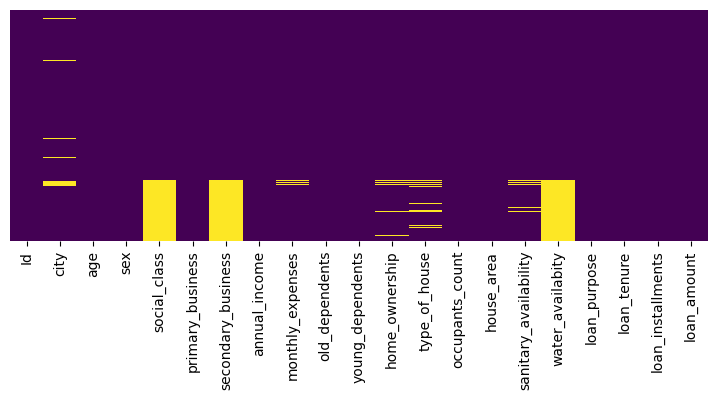

In [ ]:
plt.figure(figsize=(9,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

There are missing values. 'll manage this.

In [ ]:
df.nunique()

Id                       10270
city                       313
age                         52
sex                          3
social_class               149
primary_business           225
secondary_business           5
annual_income              205
monthly_expenses           142
old_dependents               3
young_dependents             7
home_ownership               2
type_of_house                3
occupants_count             13
house_area                 240
sanitary_availability        2
water_availabity             2
loan_purpose                30
loan_tenure                  2
loan_installments            9
loan_amount                 67
dtype: int64

#### Personal Details:

In [ ]:
personal_features = ["city","age","sex","social_class"]

In [ ]:
personal_data = pd.DataFrame(df,columns=personal_features)
personal_data.head()

,city,age,sex,social_class
0,dhanbad,22.0,F,mochi
1,manjapra,21.0,F,obc
2,dhanbad,24.0,M,nai
3,NaN,26.0,F,obc
4,nuapada,23.0,F,obc


In [ ]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          9776 non-null   object 
 1   age           10269 non-null  float64
 2   sex           10269 non-null  object 
 3   social_class  7586 non-null   object 
dtypes: float64(1), object(3)
memory usage: 321.1+ KB


In [ ]:
personal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10269.0,110.169734,7559.696301,18.0,29.0,35.0,42.0,766105.0


In [ ]:
personal_data.isnull().sum()

city             494
age                1
sex                1
social_class    2684
dtype: int64

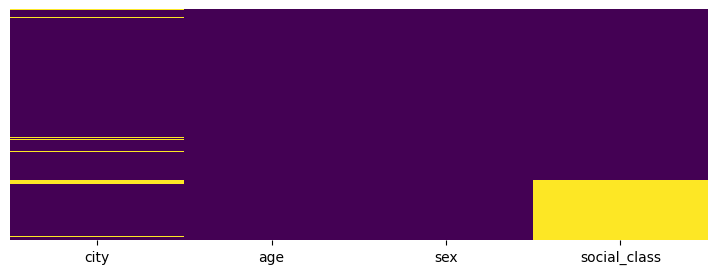

In [ ]:
plt.figure(figsize=(9,3))
sns.heatmap(personal_data.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
personal_data.nunique()

city            313
age              52
sex               3
social_class    149
dtype: int64

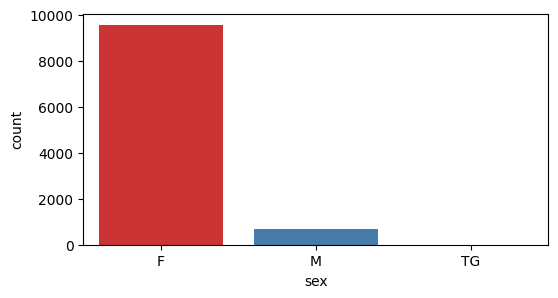

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=personal_data, x='sex', palette='Set1');

In [ ]:
personal_data[(personal_data['sex']=="M")].count()

city            592
age             692
sex             692
social_class    655
dtype: int64

In [ ]:
personal_data[(personal_data['sex']=="F")].count()

city            9181
age             9575
sex             9575
social_class    6929
dtype: int64

In [ ]:
personal_data[(personal_data['sex']=="TG")].count()

city            2
age             2
sex             2
social_class    2
dtype: int64

#### Financial details:

In [ ]:
financial_features = ["primary_business", "secondary_business", "annual_income", "monthly_expenses", "old_dependents", "young_dependents"]

In [ ]:
financial_data = pd.DataFrame(df, columns=financial_features)
financial_data.head()

,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents
0,tailoring,Others,36000.0,5000.0,0.0,2.0
1,tailoring,none,94000.0,3600.0,1.0,1.0
2,beauty salon,Others,48000.0,4000.0,0.0,2.0
3,tailoring,none,7000.0,5000.0,0.0,2.0
4,general store,Agriculture,36000.0,3500.0,0.0,0.0


In [ ]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_business    10259 non-null  object 
 1   secondary_business  7589 non-null   object 
 2   annual_income       10269 non-null  float64
 3   monthly_expenses    10159 non-null  float64
 4   old_dependents      10269 non-null  float64
 5   young_dependents    10269 non-null  float64
dtypes: float64(4), object(2)
memory usage: 481.5+ KB


In [ ]:
financial_data.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,10269.0,23287.911189,23666.402165,0.0,0.0,18000.0,36000.0,165600.0
monthly_expenses,10159.0,3723.261640,3398.499942,3.0,2900.0,3500.0,4100.0,125000.0
old_dependents,10269.0,0.037978,0.206344,0.0,0.0,0.0,0.0,2.0
young_dependents,10269.0,1.035154,1.128063,0.0,0.0,1.0,2.0,6.0


In [ ]:
financial_data.isnull().sum()

primary_business        11
secondary_business    2681
annual_income            1
monthly_expenses       111
old_dependents           1
young_dependents         1
dtype: int64

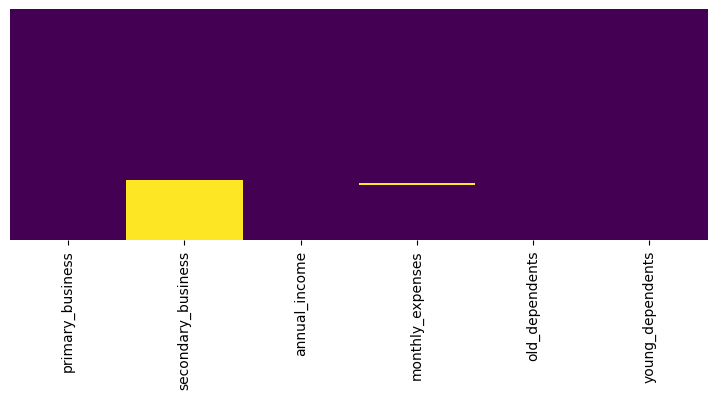

In [ ]:
plt.figure(figsize=(9,3))
sns.heatmap(financial_data.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
financial_data.nunique()

primary_business      225
secondary_business      5
annual_income         205
monthly_expenses      142
old_dependents          3
young_dependents        7
dtype: int64

Count of different categories in - ["secondary_business, old_dependents, and young_dependents"]: 


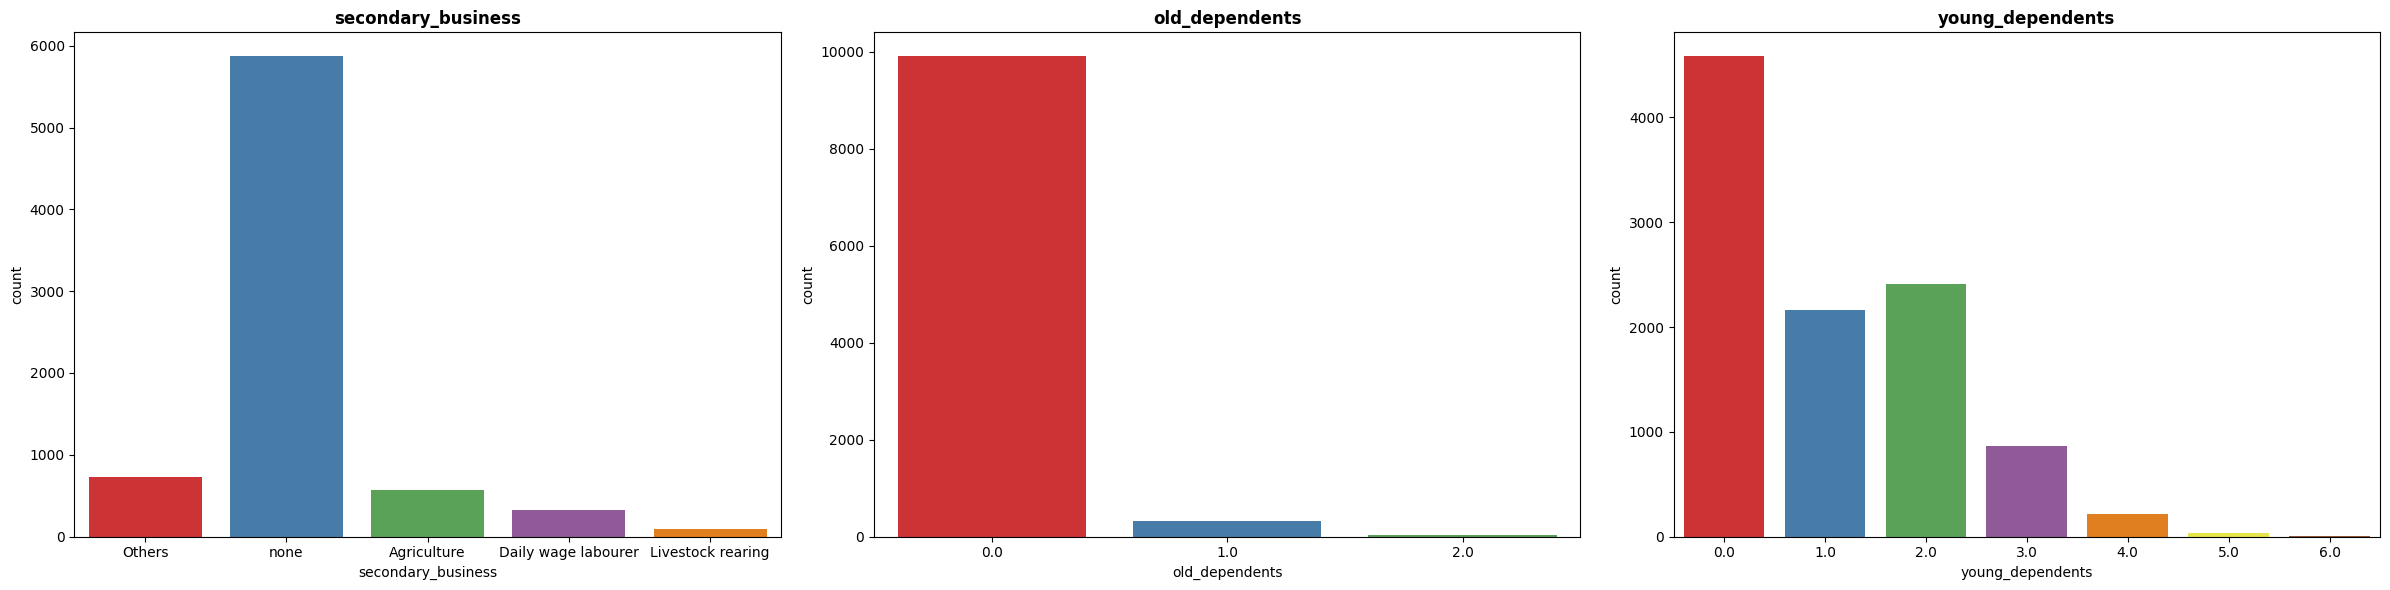

In [ ]:
print('Count of different categories in - ["secondary_business, old_dependents, and young_dependents"]: \n')
fig, axis = plt.subplots(1,3, figsize=(24,6))

all_cols = ["secondary_business", "old_dependents", "young_dependents"]
for i, ax in enumerate(axis.flatten()):
    if i < len(all_cols):
        sns.countplot(data=financial_data, x=all_cols[i], ax=ax, palette='Set1')
        ax.set_title(all_cols[i], fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

#### House details:

In [ ]:
house_features = ["home_ownership", "type_of_house", "occupants_count", "house_area", "sanitary_availability", "water_availabity"]

In [ ]:
house_data = pd.DataFrame(df, columns=house_features)
house_data.head()

,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity
0,1.0,R,4.0,70.0,1.0,0.5
1,1.0,T1,4.0,80.0,1.0,0.5
2,1.0,T1,4.0,50.0,1.0,0.5
3,1.0,T1,5.0,50.0,1.0,0.5
4,1.0,T1,1.0,112.0,1.0,0.5


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   home_ownership         10060 non-null  float64
 1   type_of_house          9824 non-null   object 
 2   occupants_count        10269 non-null  float64
 3   house_area             10269 non-null  float64
 4   sanitary_availability  10085 non-null  float64
 5   water_availabity       7588 non-null   float64
dtypes: float64(5), object(1)
memory usage: 481.5+ KB


In [ ]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
home_ownership,10060.0,0.953082,0.211475,0.0,1.0,1.0,1.0,1.0
occupants_count,10269.0,2.409095,4.969584,0.0,0.0,2.0,4.0,400.0
house_area,10269.0,353.378518,1697.071251,0.0,0.0,250.0,400.0,125000.0
sanitary_availability,10085.0,0.752405,0.431637,0.0,1.0,1.0,1.0,1.0
water_availabity,7588.0,0.500132,0.008117,0.5,0.5,0.5,0.5,1.0


In [ ]:
house_data.isnull().sum()

home_ownership            210
type_of_house             446
occupants_count             1
house_area                  1
sanitary_availability     185
water_availabity         2682
dtype: int64

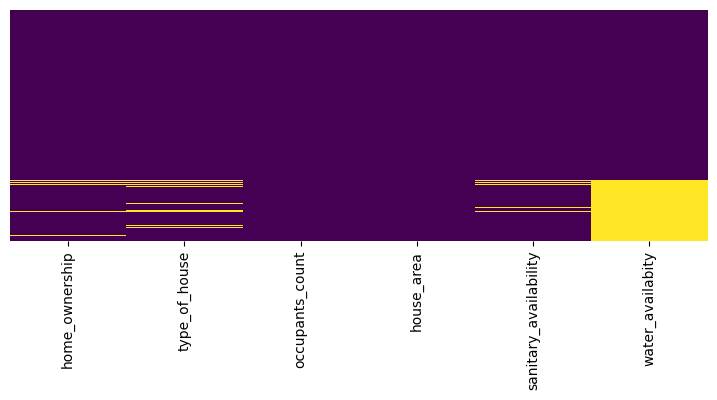

In [ ]:
plt.figure(figsize=(9,3))
sns.heatmap(house_data.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
house_data.count()

home_ownership           10060
type_of_house             9824
occupants_count          10269
house_area               10269
sanitary_availability    10085
water_availabity          7588
dtype: int64

In [ ]:
house_data.nunique()

home_ownership             2
type_of_house              3
occupants_count           13
house_area               240
sanitary_availability      2
water_availabity           2
dtype: int64

Count of different categories in - ["home_ownership", "type_of_house", "sanitary_availability", "water_availabity"]: 


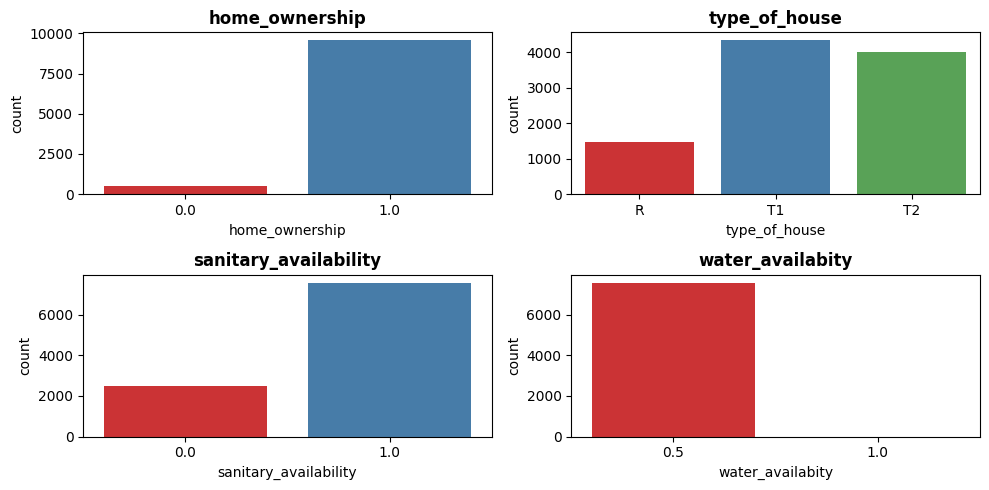

In [ ]:
print('Count of different categories in - ["home_ownership", "type_of_house", "sanitary_availability", "water_availabity"]: \n')
fig, axis = plt.subplots(2,2, figsize=(10,5))

all_cols = ["home_ownership", "type_of_house", "sanitary_availability", "water_availabity"]
for i, ax in enumerate(axis.flatten()):
    if i < len(all_cols):
        sns.countplot(data=house_data, x=all_cols[i], ax=ax, palette='Set1')
        ax.set_title(all_cols[i], fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

#### Loan details:

In [ ]:
loan_features = ["loan_purpose","loan_tenure","loan_installments","loan_amount"]

In [ ]:
loan_data = pd.DataFrame(df, columns=loan_features)
loan_data.head()

,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Apparels,12.0,12.0,5000.0
1,Apparels,12.0,50.0,7500.0
2,Beauty Salon,12.0,12.0,5000.0
3,Apparels,12.0,50.0,7500.0
4,Retail Store,12.0,12.0,5000.0


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_purpose       10259 non-null  object 
 1   loan_tenure        10269 non-null  float64
 2   loan_installments  10269 non-null  float64
 3   loan_amount        10269 non-null  float64
dtypes: float64(3), object(1)
memory usage: 321.1+ KB


In [ ]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_tenure,10269.0,12.078294,0.966172,12.0,12.0,12.0,12.0,24.0
loan_installments,10269.0,23.636479,17.528101,6.0,12.0,12.0,50.0,74.0
loan_amount,10269.0,5646.956860,1734.231013,1000.0,5000.0,5000.0,5500.0,19000.0


In [ ]:
loan_data.isnull().sum()

loan_purpose         11
loan_tenure           1
loan_installments     1
loan_amount           1
dtype: int64

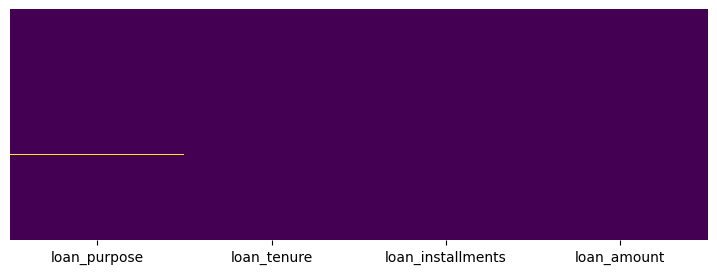

In [ ]:
plt.figure(figsize=(9,3))
sns.heatmap(loan_data.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
loan_data.count()

loan_purpose         10259
loan_tenure          10269
loan_installments    10269
loan_amount          10269
dtype: int64

In [ ]:
loan_data.nunique()

loan_purpose         30
loan_tenure           2
loan_installments     9
loan_amount          67
dtype: int64

#### Handling missing values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10270 non-null  int64  
 1   city                   9776 non-null   object 
 2   age                    10269 non-null  float64
 3   sex                    10269 non-null  object 
 4   social_class           7586 non-null   object 
 5   primary_business       10259 non-null  object 
 6   secondary_business     7589 non-null   object 
 7   annual_income          10269 non-null  float64
 8   monthly_expenses       10159 non-null  float64
 9   old_dependents         10269 non-null  float64
 10  young_dependents       10269 non-null  float64
 11  home_ownership         10060 non-null  float64
 12  type_of_house          9824 non-null   object 
 13  occupants_count        10269 non-null  float64
 14  house_area             10269 non-null  float64
 15  sa

In [ ]:
df.isnull().sum()

Id                          0
city                      494
age                         1
sex                         1
social_class             2684
primary_business           11
secondary_business       2681
annual_income               1
monthly_expenses          111
old_dependents              1
young_dependents            1
home_ownership            210
type_of_house             446
occupants_count             1
house_area                  1
sanitary_availability     185
water_availabity         2682
loan_purpose               11
loan_tenure                 1
loan_installments           1
loan_amount                 1
dtype: int64

In [ ]:
def perecnt_missing(df):
    missing = {}
    for feature in list(df.columns):
        missing[feature] = round(100*df[feature].isnull().sum()/len(df), 2)
    return json.dumps(missing, indent=4)

In [ ]:
 print('% of missing data in each feature: \n', perecnt_missing(df))

% of missing data in each feature: 
 {
    "Id": 0.0,
    "city": 4.81,
    "age": 0.01,
    "sex": 0.01,
    "social_class": 26.13,
    "primary_business": 0.11,
    "secondary_business": 26.11,
    "annual_income": 0.01,
    "monthly_expenses": 1.08,
    "old_dependents": 0.01,
    "young_dependents": 0.01,
    "home_ownership": 2.04,
    "type_of_house": 4.34,
    "occupants_count": 0.01,
    "house_area": 0.01,
    "sanitary_availability": 1.8,
    "water_availabity": 26.11,
    "loan_purpose": 0.11,
    "loan_tenure": 0.01,
    "loan_installments": 0.01,
    "loan_amount": 0.01
}


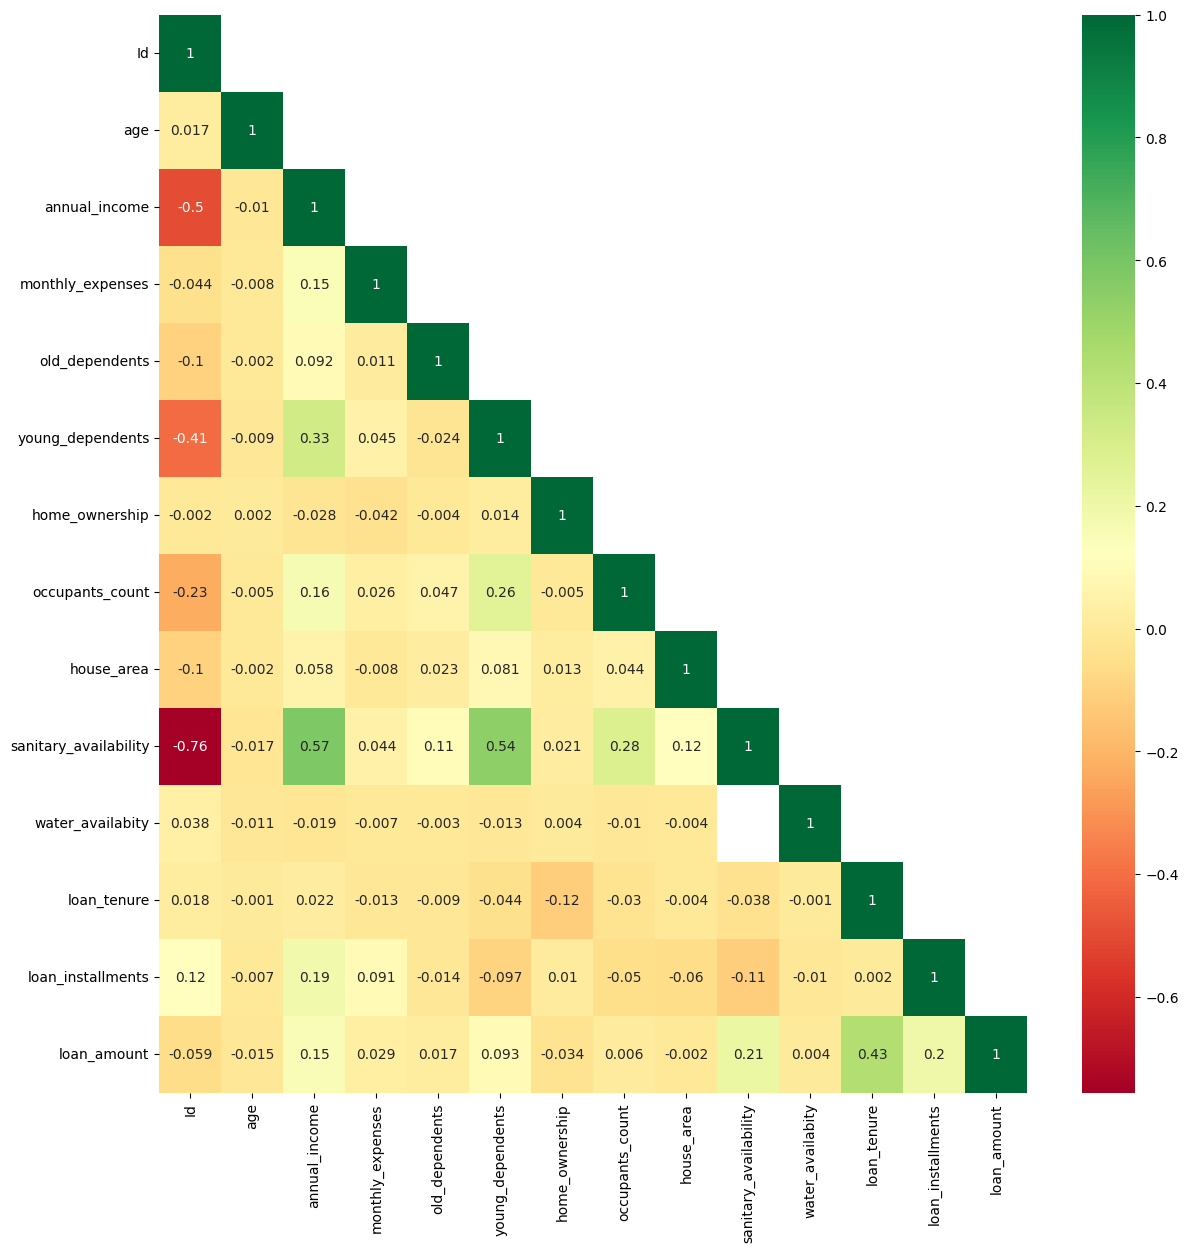

In [ ]:
plt.figure(figsize=(14,14))

corr_matrix = df.corr(numeric_only=True)
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
lower_triangle = corr_matrix.where(mask)

sns.heatmap(round(lower_triangle, 3), annot=True, cmap='RdYlGn');

No strong corelation!

In [ ]:
all_features = list(df.columns)
print('>>> All features: \n', all_features)

>>> All features: 
 ['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']


In [ ]:
dependent_feature = ['loan_amount']
independent_features = [feature for feature in all_features if feature not in dependent_feature]

print('>>> All independent_features: \n', independent_features)

>>> All independent_features: 
 ['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments']


In [ ]:
# Check unique categories in features with less than or equal to 10 unique values
for feature in all_features:
    if len(df[feature].unique()) <= 10:
        print(f'>> Unique categories in {feature}: \n', df[feature].unique(), '\n')

>> Unique categories in sex: 
 ['F' 'M' 'TG' nan] 

>> Unique categories in secondary_business: 
 ['Others' 'none' 'Agriculture' 'Daily wage labourer' 'Livestock rearing'
 nan] 

>> Unique categories in old_dependents: 
 [ 0.  1.  2. nan] 

>> Unique categories in young_dependents: 
 [ 2.  1.  0.  3.  4.  5.  6. nan] 

>> Unique categories in home_ownership: 
 [ 1.  0. nan] 

>> Unique categories in type_of_house: 
 ['R' 'T1' 'T2' nan] 

>> Unique categories in sanitary_availability: 
 [ 1. nan  0.] 

>> Unique categories in water_availabity: 
 [0.5 nan 1. ] 

>> Unique categories in loan_tenure: 
 [12. 24. nan] 

>> Unique categories in loan_installments: 
 [12. 50. 24.  6. 74. 51. 53. 52. 55. nan] 


In [ ]:
cat_features = [feature for feature in independent_features if df[feature].dtype == 'O'] + ['home_ownership', 'sanitary_availability', 'water_availabity']
num_features = [feature for feature in independent_features if feature not in cat_features + ['Id']]

In [ ]:
len(df.columns), (len(cat_features) + len(num_features)) # +1 for Id

(21, 19)

In [ ]:
print('>>> All Categorical features: \n', cat_features)
print('\n>>> All Numerical features: \n', num_features)

>>> All Categorical features: 
 ['city', 'sex', 'social_class', 'primary_business', 'secondary_business', 'type_of_house', 'loan_purpose', 'home_ownership', 'sanitary_availability', 'water_availabity']

>>> All Numerical features: 
 ['age', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'occupants_count', 'house_area', 'loan_tenure', 'loan_installments']


In [ ]:
print(perecnt_missing(df[cat_features]))

{
    "city": 4.81,
    "sex": 0.01,
    "social_class": 26.13,
    "primary_business": 0.11,
    "secondary_business": 26.11,
    "type_of_house": 4.34,
    "loan_purpose": 0.11,
    "home_ownership": 2.04,
    "sanitary_availability": 1.8,
    "water_availabity": 26.11
}


In [ ]:
print(perecnt_missing(df[num_features]))

{
    "age": 0.01,
    "annual_income": 0.01,
    "monthly_expenses": 1.08,
    "old_dependents": 0.01,
    "young_dependents": 0.01,
    "occupants_count": 0.01,
    "house_area": 0.01,
    "loan_tenure": 0.01,
    "loan_installments": 0.01
}


Not much data is missing, let's not drop any features, instead let's impute missing values with mode/median:

In [ ]:
for feature in independent_features:
    if df[feature].isnull().sum() > 0:
        if feature in cat_features:
            print('Mode imputation applied for:', feature)
            df[feature] = df[feature].fillna(df[feature].mode()[0]) # Mode imputation for cat_features
        else:
            print('Mean imputation applied for:', feature)
            df[feature] = df[feature].fillna(df[feature].mean()) # Mean imputation for num_feature

Mode imputation applied for: city
Mean imputation applied for: age
Mode imputation applied for: sex
Mode imputation applied for: social_class
Mode imputation applied for: primary_business
Mode imputation applied for: secondary_business
Mean imputation applied for: annual_income
Mean imputation applied for: monthly_expenses
Mean imputation applied for: old_dependents
Mean imputation applied for: young_dependents
Mode imputation applied for: home_ownership
Mode imputation applied for: type_of_house
Mean imputation applied for: occupants_count
Mean imputation applied for: house_area
Mode imputation applied for: sanitary_availability
Mode imputation applied for: water_availabity
Mode imputation applied for: loan_purpose
Mean imputation applied for: loan_tenure
Mean imputation applied for: loan_installments


In [ ]:
print(perecnt_missing(df))

{
    "Id": 0.0,
    "city": 0.0,
    "age": 0.0,
    "sex": 0.0,
    "social_class": 0.0,
    "primary_business": 0.0,
    "secondary_business": 0.0,
    "annual_income": 0.0,
    "monthly_expenses": 0.0,
    "old_dependents": 0.0,
    "young_dependents": 0.0,
    "home_ownership": 0.0,
    "type_of_house": 0.0,
    "occupants_count": 0.0,
    "house_area": 0.0,
    "sanitary_availability": 0.0,
    "water_availabity": 0.0,
    "loan_purpose": 0.0,
    "loan_tenure": 0.0,
    "loan_installments": 0.0,
    "loan_amount": 0.01
}


All good now!

In [ ]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,dhanbad,22.0,F,mochi,tailoring,Others,36000.0,5000.0,0.0,2.0,1.0,R,4.0,70.0,1.0,0.5,Apparels,12.0,12.0,5000.0
1,2,manjapra,21.0,F,obc,tailoring,none,94000.0,3600.0,1.0,1.0,1.0,T1,4.0,80.0,1.0,0.5,Apparels,12.0,50.0,7500.0
2,3,dhanbad,24.0,M,nai,beauty salon,Others,48000.0,4000.0,0.0,2.0,1.0,T1,4.0,50.0,1.0,0.5,Beauty Salon,12.0,12.0,5000.0
3,4,pusad,26.0,F,obc,tailoring,none,7000.0,5000.0,0.0,2.0,1.0,T1,5.0,50.0,1.0,0.5,Apparels,12.0,50.0,7500.0
4,5,nuapada,23.0,F,obc,general store,Agriculture,36000.0,3500.0,0.0,0.0,1.0,T1,1.0,112.0,1.0,0.5,Retail Store,12.0,12.0,5000.0


In [ ]:
# Check Age range

df_age = df.copy()

# Create bins for age groups
bins = [0, 17, 81, float('inf')]
labels = ['<18', '18-80', '>80']

# Categorize ages into age groups
df_age['age_group'] = pd.cut(df_age['age'], bins=bins, labels=labels)

# Get count of each age group
age_group_counts = df_age['age_group'].value_counts()

print(age_group_counts)

18-80    10267
>80          3
<18          0
Name: age_group, dtype: int64


**Let's drop age<18 and age>80 line items:**

In [ ]:
df = df.drop(df[(df['age'] < 18) | (df['age'] > 80)].index)

#### Vusualizations:

##### Categorical features:

In [ ]:
len(cat_features)

10

In [ ]:
def get_central_loan_amt(df, cat_columns, centrality):
    central_loan_amt_combined = {}

    for col in cat_columns:
        central_loan_amts = {}

        types = list(df[col].unique())
        for a_type in types:
            if centrality == 'mean':
                central_loan_amt = df[df[col] == a_type]['loan_amount'].mean()
                central_loan_amts[a_type] = central_loan_amt
            elif centrality == 'median':
                central_loan_amt = df[df[col] == a_type]['loan_amount'].median()
                central_loan_amts[a_type] = central_loan_amt
        sorted_items = sorted(central_loan_amts.items())
        central_loan_amts = dict(sorted_items)

        central_loan_amt_combined[col] = central_loan_amts

    return central_loan_amt_combined

In [ ]:
mean_loan_amts = get_central_loan_amt(df, cat_features, centrality='mean')

In [ ]:
median_loan_amts = get_central_loan_amt(df, cat_features, centrality='median')

Variation of "mean" loan_amount across each category in a categorical feature: 

	 For city - Max Value: 15000.0 | Min Value: 2000.0 | Difference = 13000.0
	 For sex - Max Value: 6500.0 | Min Value: 5557.0 | Difference = 943.0
	 For social_class - Max Value: 15000.0 | Min Value: 3000.0 | Difference = 12000.0
	 For primary_business - Max Value: 15000.0 | Min Value: 3077.0 | Difference = 11923.0
	 For secondary_business - Max Value: 5734.0 | Min Value: 5000.0 | Difference = 734.0
	 For type_of_house - Max Value: 5776.0 | Min Value: 5493.0 | Difference = 283.0
	 For loan_purpose - Max Value: 8523.0 | Min Value: 4582.0 | Difference = 3941.0
	 For home_ownership - Max Value: 5897.0 | Min Value: 5635.0 | Difference = 262.0
	 For sanitary_availability - Max Value: 5853.0 | Min Value: 5005.0 | Difference = 848.0
	 For water_availabity - Max Value: 6250.0 | Min Value: 5647.0 | Difference = 603.0


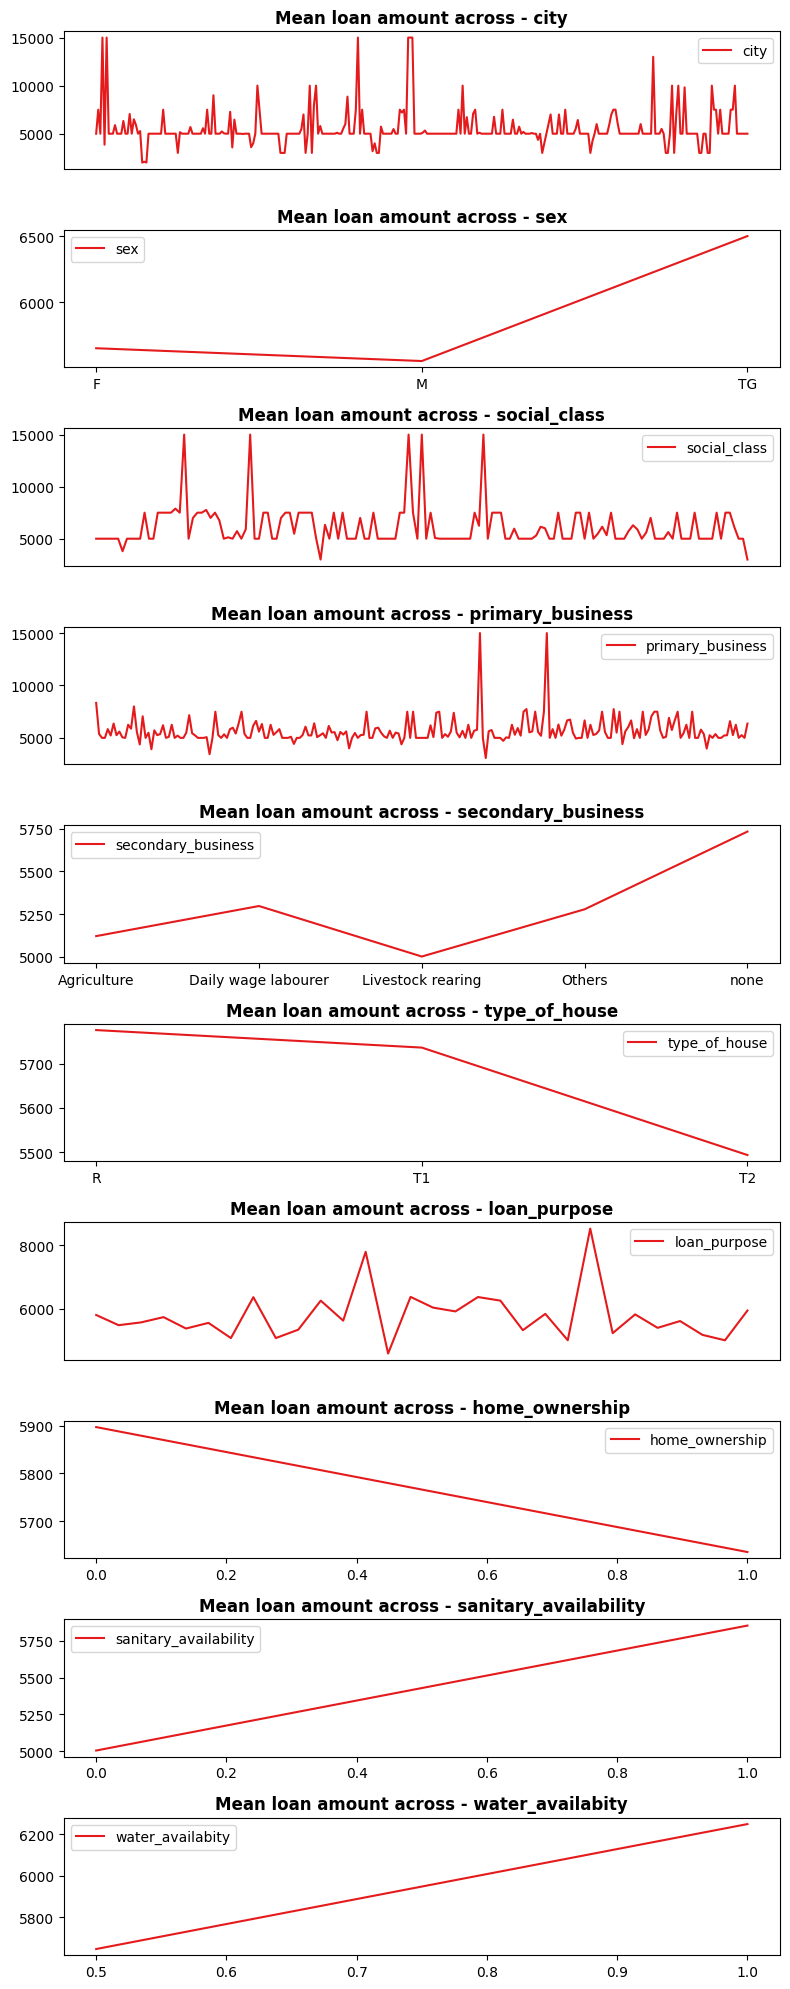

In [ ]:
print('Variation of "mean" loan_amount across each category in a categorical feature: \n')
fig, axis = plt.subplots(10,1, figsize=(8,20))

all_cols = list(mean_loan_amts.keys())
for i, ax in enumerate(axis.flatten()):
    if i < len(mean_loan_amts.keys()):
        mean_price_df = pd.DataFrame.from_dict(mean_loan_amts[all_cols[i]], orient='index', columns=[all_cols[i]])
        sns.lineplot(data=mean_price_df, ax=ax, palette='Set1')
        ax.set_title('Mean loan amount across - ' + all_cols[i], fontsize=12, fontweight='bold')

        # Check number of xticks
        if len(mean_price_df.index) > 10:
            ax.set_xticks([])  # Remove xticks if count of all xticks>10

        max_value, min_value = round(max(mean_price_df[all_cols[i]]), 0), round(min(mean_price_df[all_cols[i]]), 0)
        diff = max_value - min_value
        print(f"\t For {all_cols[i]} - Max Value: {max_value} | Min Value: {min_value} | Difference = {diff}")
plt.tight_layout()
plt.show()

Variation of "median" loan_amount across each category in a categorical feature: 

	 For city - Max Value: 15000.0 | Min Value: 2000.0 | Difference = 13000.0
	 For sex - Max Value: 6500.0 | Min Value: 5000.0 | Difference = 1500.0
	 For social_class - Max Value: 15000.0 | Min Value: 3000.0 | Difference = 12000.0
	 For primary_business - Max Value: 15000.0 | Min Value: 3000.0 | Difference = 12000.0
	 For secondary_business - Max Value: 5000.0 | Min Value: 5000.0 | Difference = 0.0
	 For type_of_house - Max Value: 5000.0 | Min Value: 5000.0 | Difference = 0.0
	 For loan_purpose - Max Value: 7500.0 | Min Value: 5000.0 | Difference = 2500.0
	 For home_ownership - Max Value: 5000.0 | Min Value: 5000.0 | Difference = 0.0
	 For sanitary_availability - Max Value: 5000.0 | Min Value: 5000.0 | Difference = 0.0
	 For water_availabity - Max Value: 6250.0 | Min Value: 5000.0 | Difference = 1250.0


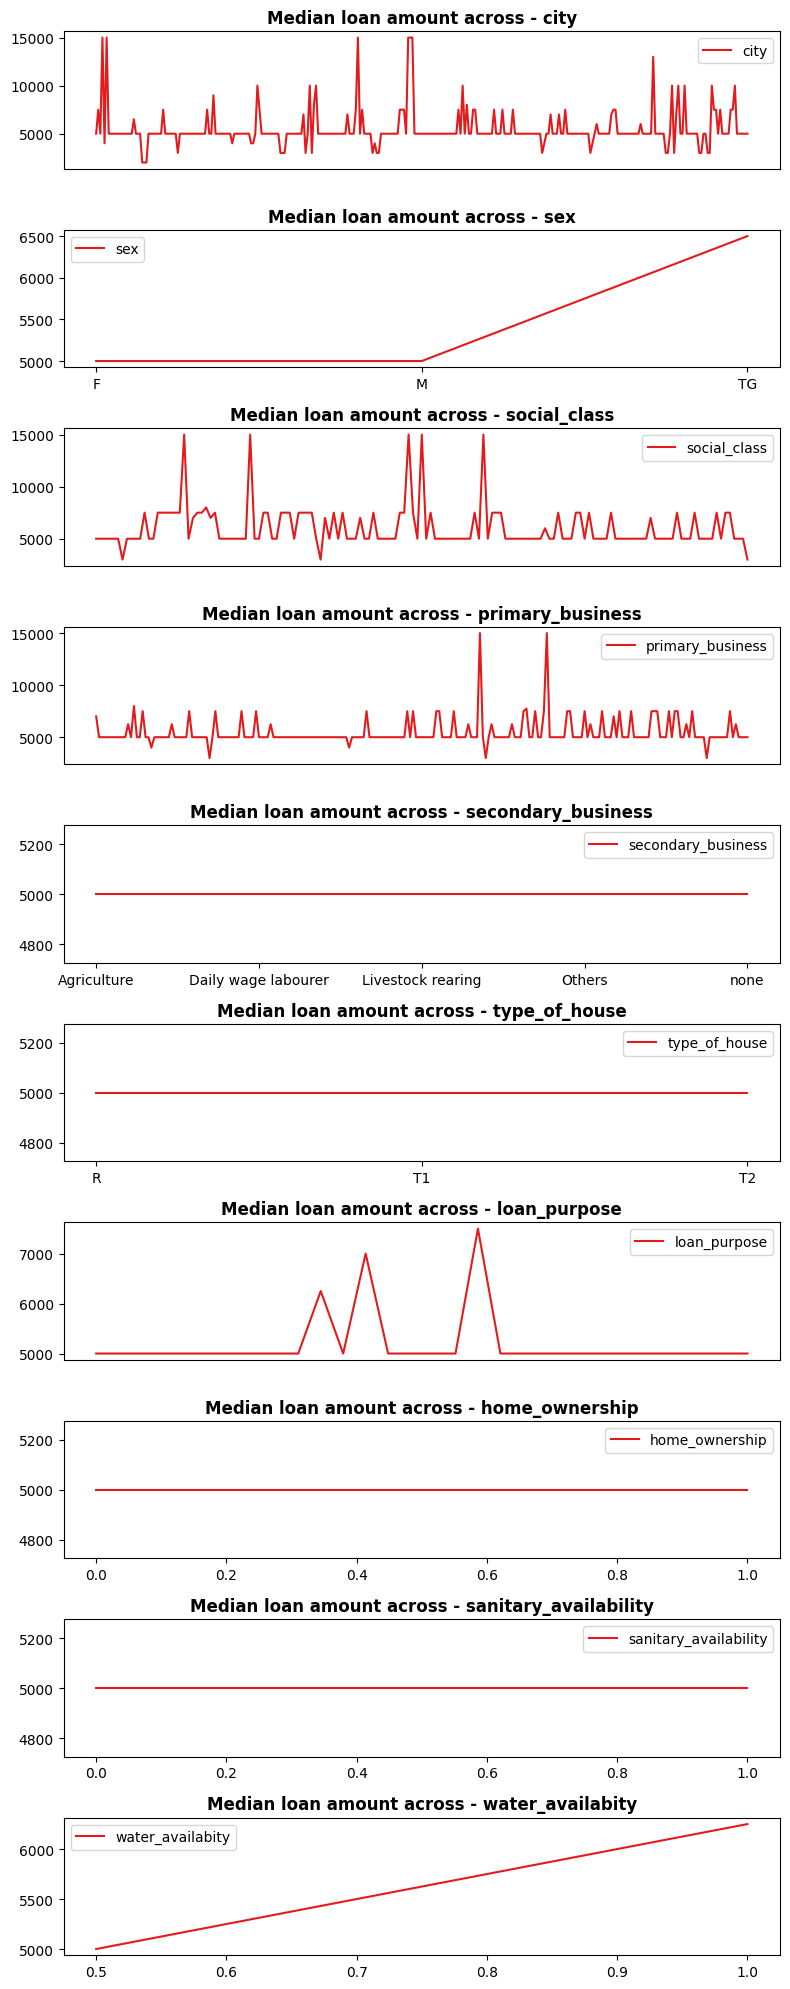

In [ ]:
print('Variation of "median" loan_amount across each category in a categorical feature: \n')
fig, axis = plt.subplots(10,1, figsize=(8,20))

all_cols = list(median_loan_amts.keys())
for i, ax in enumerate(axis.flatten()):
    if i < len(median_loan_amts.keys()):
        median_price_df = pd.DataFrame.from_dict(median_loan_amts[all_cols[i]], orient='index', columns=[all_cols[i]])
        sns.lineplot(data=median_price_df, ax=ax, palette='Set1')
        ax.set_title('Median loan amount across - ' + all_cols[i], fontsize=12, fontweight='bold')
        max_value, min_value = round(max(median_price_df[all_cols[i]]), 0), round(min(median_price_df[all_cols[i]]), 0)

        # Check number of xticks
        if len(median_price_df.index) > 10:
            ax.set_xticks([])  # Remove xticks if count of all xticks>10

        diff = max_value - min_value
        print(f"\t For {all_cols[i]} - Max Value: {max_value} | Min Value: {min_value} | Difference = {diff}")
plt.tight_layout()
plt.show()

##### Numerical features:

In [ ]:
len(num_features)

9

In [ ]:
discreate_num_features, continuous_num_features = [], []

for feature in num_features:
        discreate_num_features.append(feature) if df[feature].nunique() <= 25 else continuous_num_features.append(feature)


In [ ]:
discreate_num_features

['old_dependents',
 'young_dependents',
 'occupants_count',
 'loan_tenure',
 'loan_installments']

In [ ]:
continuous_num_features

['age', 'annual_income', 'monthly_expenses', 'house_area']

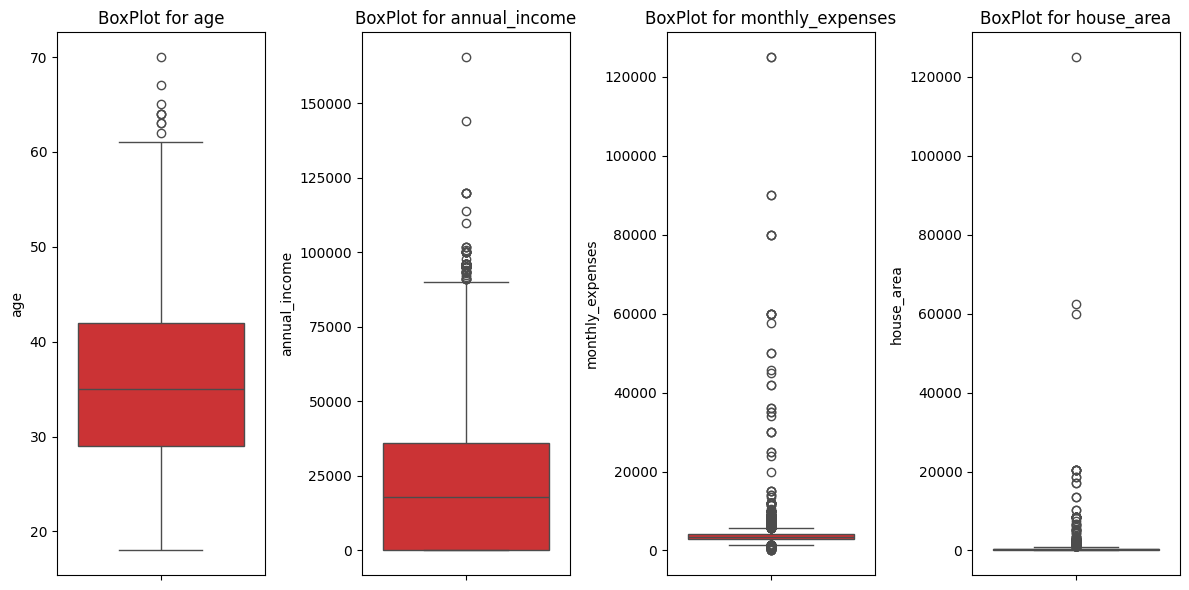

In [ ]:
# Continuous Numerical Variable - Checking Outliers

fig, axis = plt.subplots(1,4, figsize=(12,6))
for i, ax in enumerate(axis.flatten()):
    if i < len(continuous_num_features):
        sns.boxplot(df[continuous_num_features[i]], ax=ax, palette='Set1')
        ax.set_title(f'BoxPlot for {continuous_num_features[i]}')
plt.tight_layout()
plt.show()

In [ ]:
def drop_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

In [ ]:
len(df)

10267

In [ ]:
for feature in continuous_num_features:
    df = drop_outliers(df, feature)

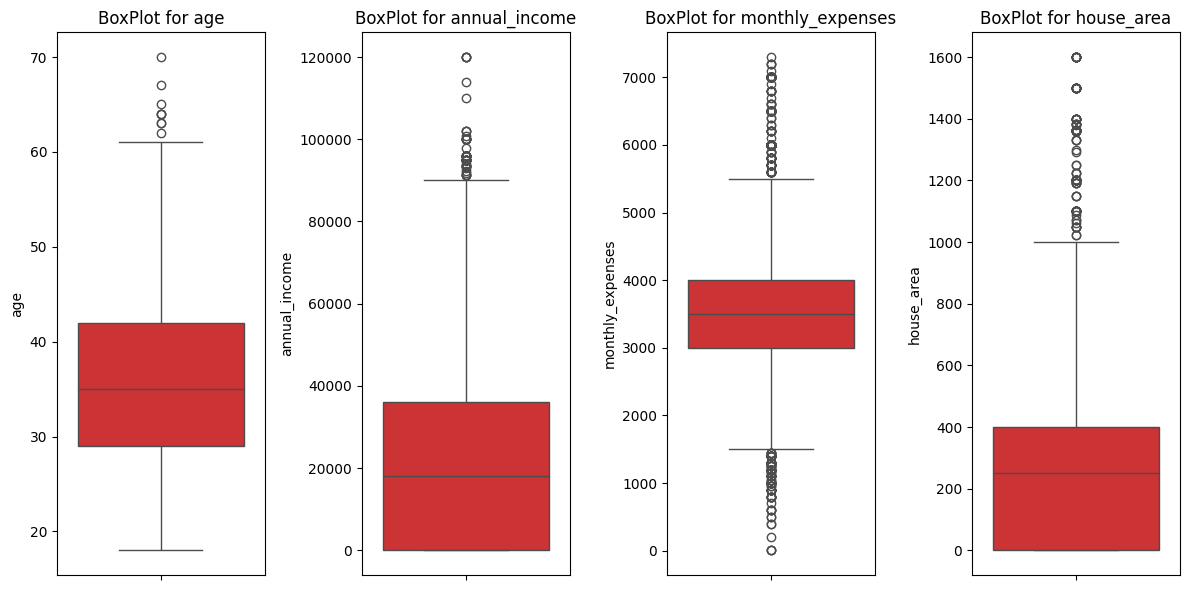

In [ ]:
# Continuous Numerical Variable - Checking Outliers

fig, axis = plt.subplots(1,4, figsize=(12,6))
for i, ax in enumerate(axis.flatten()):
    if i < len(continuous_num_features):
        sns.boxplot(df[continuous_num_features[i]], ax=ax, palette='Set1')
        ax.set_title(f'BoxPlot for {continuous_num_features[i]}')
plt.tight_layout()
plt.show()

Looks better now!

In [ ]:
len(df)

10033

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_data(df, feature):
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[feature], bins=50, kde=True, palette='Set1')
    plt.title(f'Histogram of feature - {feature}')

    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)

    plt.tight_layout()
    plt.show()

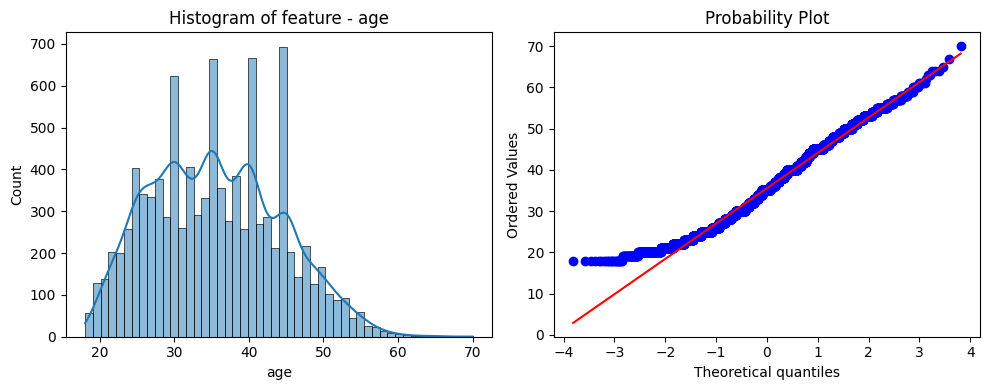

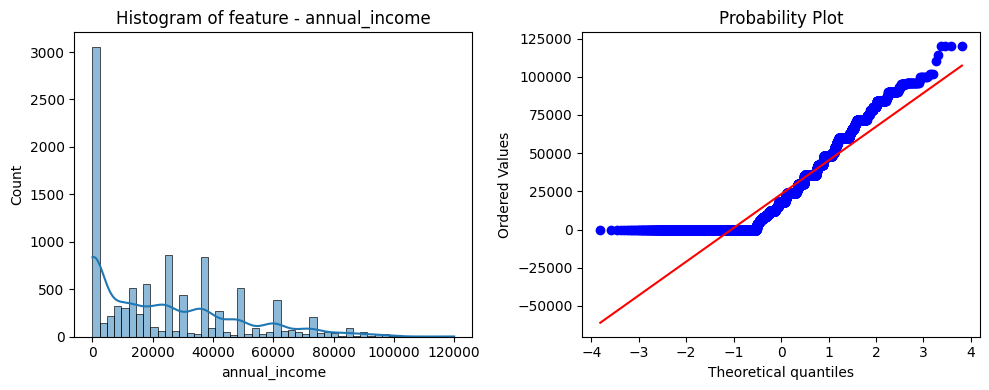

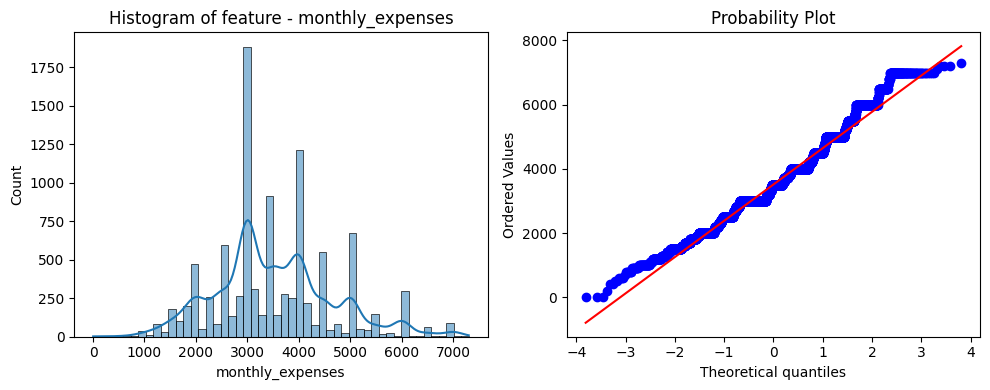

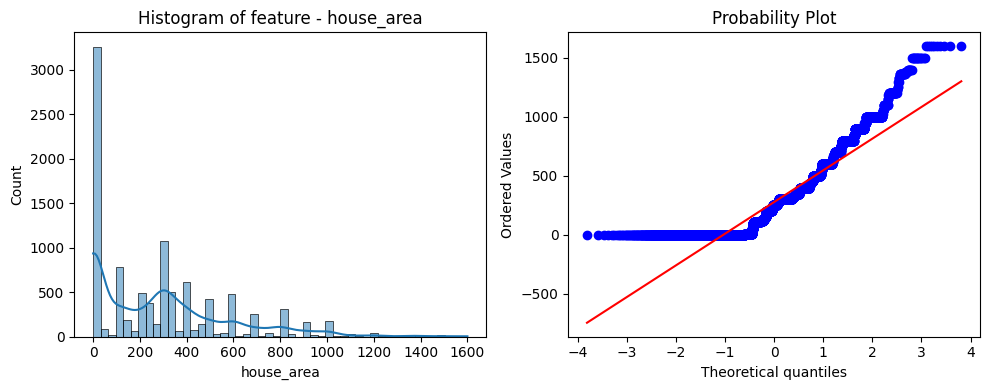

In [ ]:
# Continuous Numerical Variables - Checking Normality

skipped_features = []
for feature in continuous_num_features:
    plot_data(df, feature=feature)

Let's try some transformations on **continuous numerical variables** to see if they can be further normalized

In [ ]:
try_normalization = df.copy()[continuous_num_features]

In [ ]:
try_normalization.head()

,age,annual_income,monthly_expenses,house_area
0,22.0,36000.0,5000.0,70.0
1,21.0,94000.0,3600.0,80.0
2,24.0,48000.0,4000.0,50.0
3,26.0,7000.0,5000.0,50.0
4,23.0,36000.0,3500.0,112.0


In [ ]:
tansformations_to_apply = ['log', 'reciprocal', 'square_root', 'exponential', 'boxcox']

In [ ]:
from scipy.stats import boxcox, yeojohnson


In [ ]:
for feature in try_normalization.columns:
    for tr in tansformations_to_apply:
        if tr == 'log':
            try_normalization[feature + '_' + tr] = np.log(try_normalization[feature])
        elif tr == 'reciprocal':
            try_normalization[feature + '_' + tr] = 1 / try_normalization[feature].replace(0, np.nan)
        elif tr == 'square_root':
            try_normalization[feature + '_' + tr] = np.sqrt(try_normalization[feature])
        elif tr == 'exponential':
            try_normalization[feature + '_' + tr] = (try_normalization[feature])**(1/1.2)
        elif tr == 'boxcox':
            # Apply Box-Cox transformation, avoiding negative values if possible
            try:
                transformed_data, _ = boxcox(try_normalization[feature])
                try_normalization[feature + '_' + tr] = transformed_data
            except ValueError:
                # If Box-Cox fails, try Yeo-Johnson transformation
                print('BoxCox failed for:', feature, 'applying Yeo-Johnson instead!')
                transformed_data, _ = yeojohnson(try_normalization[feature])
                try_normalization[feature + '_' + tr] = transformed_data

BoxCox failed for: annual_income applying Yeo-Johnson instead!
BoxCox failed for: house_area applying Yeo-Johnson instead!


In [ ]:
try_normalization.head()

,age,annual_income,monthly_expenses,house_area,age_log,age_reciprocal,age_square_root,age_exponential,age_boxcox,annual_income_log,annual_income_reciprocal,annual_income_square_root,annual_income_exponential,annual_income_boxcox,monthly_expenses_log,monthly_expenses_reciprocal,monthly_expenses_square_root,monthly_expenses_exponential,monthly_expenses_boxcox,house_area_log,house_area_reciprocal,house_area_square_root,house_area_exponential,house_area_boxcox
0,22.0,36000.0,5000.0,70.0,3.091042,0.045455,4.690416,13.142729,5.956112,10.491274,0.000028,189.736660,6264.966465,36.001463,8.517193,0.000200,70.710678,1209.135588,271.613126,4.248495,0.014286,8.366600,34.481147,7.653864
1,21.0,94000.0,3600.0,80.0,3.044522,0.047619,4.582576,12.642979,5.803905,11.451050,0.000011,306.594194,13940.335030,44.718880,8.188689,0.000278,60.000000,919.571319,222.838822,4.382027,0.012500,8.944272,38.539699,8.046513
2,24.0,48000.0,4000.0,50.0,3.178054,0.041667,4.898979,14.131102,6.248251,10.778956,0.000021,219.089023,7962.223507,38.440319,8.294050,0.000250,63.245553,1003.960577,237.450605,3.912023,0.020000,7.071068,26.050037,6.723626
3,26.0,7000.0,5000.0,50.0,3.258097,0.038462,5.099020,15.105825,6.525805,8.853665,0.000143,83.666003,1600.473054,24.510733,8.517193,0.000200,70.710678,1209.135588,271.613126,3.912023,0.020000,7.071068,26.050037,6.723626
4,23.0,36000.0,3500.0,112.0,3.135494,0.043478,4.795832,13.638707,6.104131,10.491274,0.000028,189.736660,6264.966465,36.001463,8.160518,0.000286,59.160798,898.235131,219.085583,4.718499,0.008929,10.583005,51.013096,9.098754


In [ ]:
len(continuous_num_features), len(tansformations_to_apply)+1

(4, 6)

Normality of continuous_num_features after applying various transformations: 


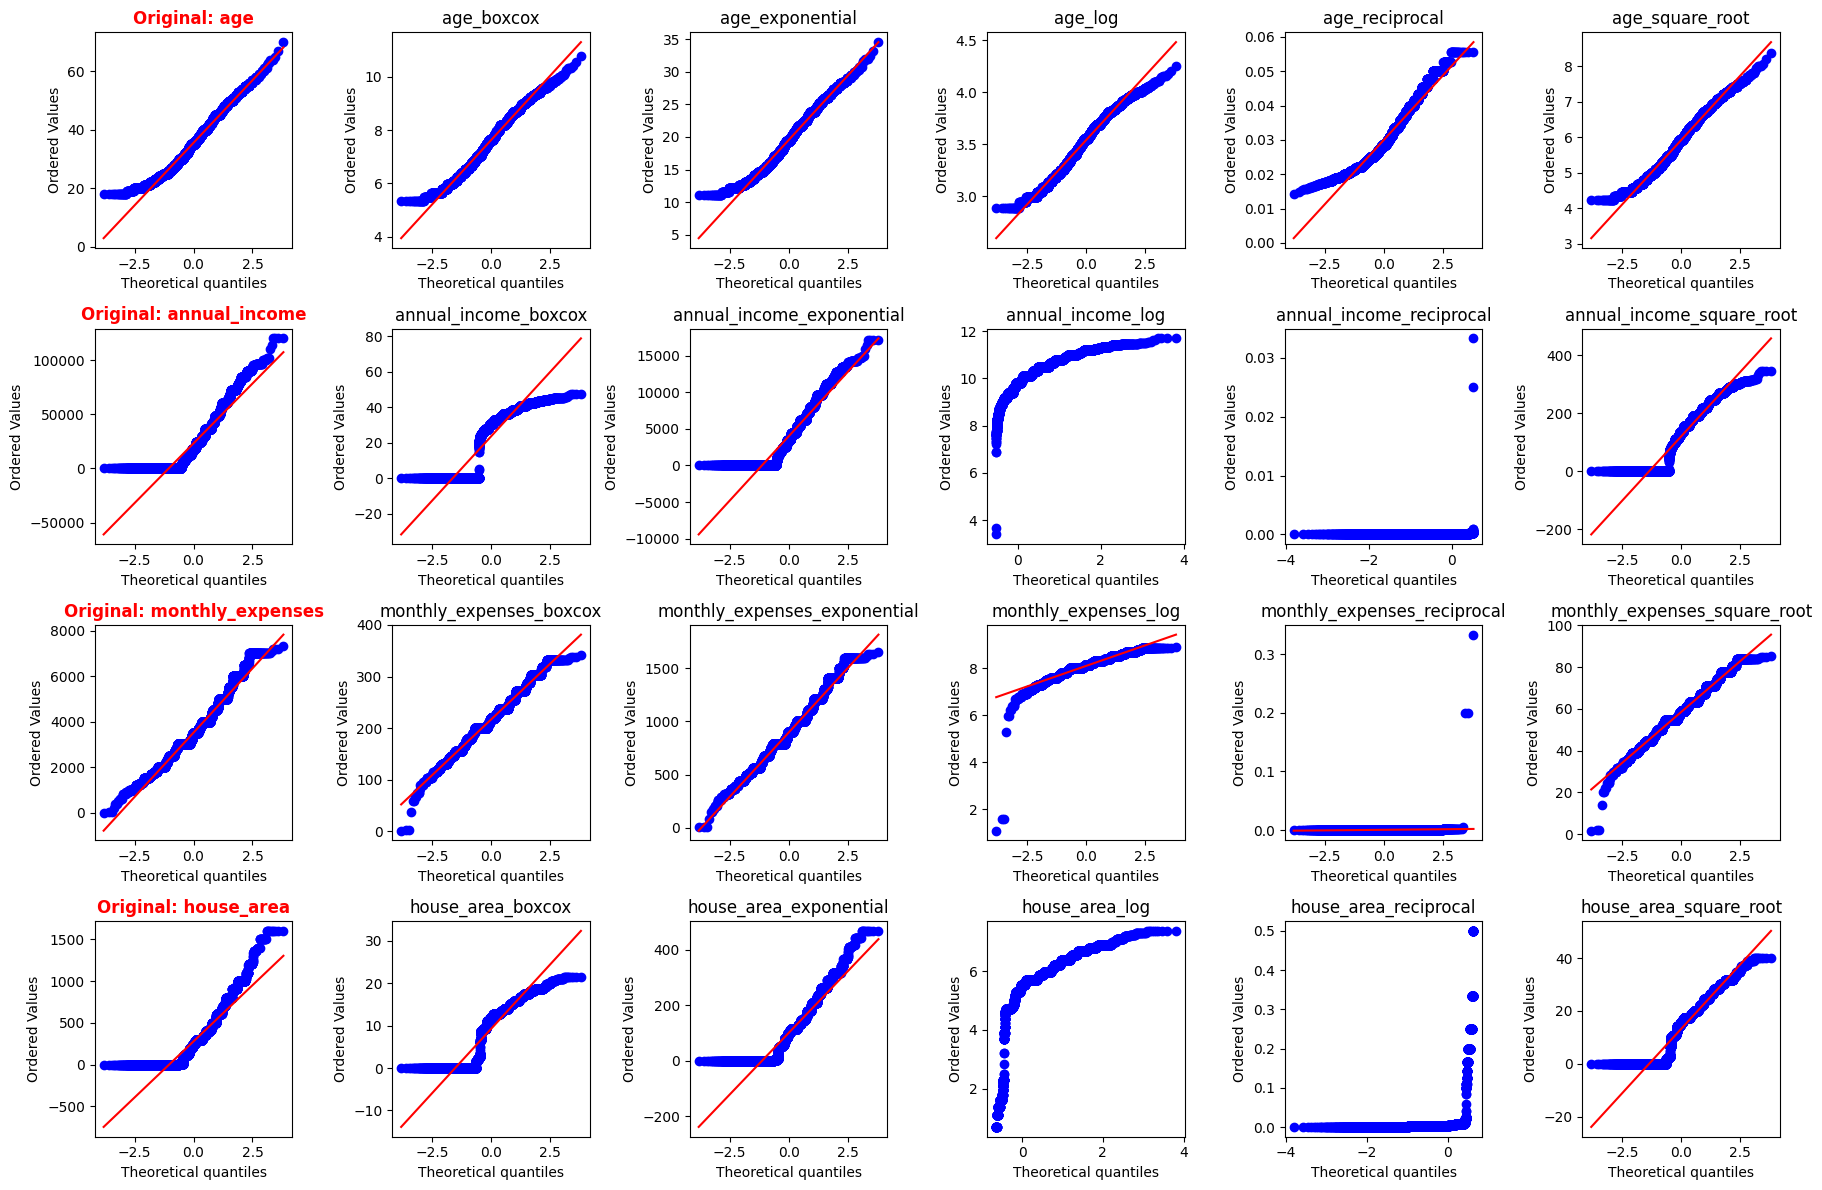

In [ ]:
print('Normality of continuous_num_features after applying various transformations: \n')
fig, axis = plt.subplots(4, 6, figsize=(18, 12))

for i, feature in enumerate(continuous_num_features):
    for j, ax in enumerate(axis[i]):
        transformed_feature = sorted([col for col in try_normalization.columns if feature in col])
        if j < len(transformed_feature):
            stat.probplot(try_normalization[transformed_feature[j]], dist='norm', plot=ax)
            ax.set_title(f'Original: {feature}', fontsize=12, fontweight='bold', color='red') if transformed_feature[j] == feature else ax.set_title(transformed_feature[j])
plt.tight_layout()
plt.show()

**original** works best in almost all the **continuous_num_features**. Let's use as-is values.

#### Dataset preparation:

Skipping some features for model creation du the following reasons:
1. Either the feature has too many categorical features. They're - ['city', 'social_class', 'primary_business', 'secondary_business', 'loan_purpose']
2. The feature is not a good predictor for lending model. They're - ['sanitary_availability', 'water_availabity']

In [ ]:
selected_features = [
    "Id", "age", "sex", "annual_income", "monthly_expenses", "old_dependents", "young_dependents",  "home_ownership", "type_of_house",
    "occupants_count", "house_area", "loan_tenure", "loan_installments"
]

In [ ]:
print('Count of selected_features:', len(selected_features))

Count of selected_features: 13


In [ ]:
dropped_features = [feat for feat in all_cols if feat not in selected_features]

print('All dropped features:', dropped_features)
print('Count:', len(dropped_features))

All dropped features: ['city', 'social_class', 'primary_business', 'secondary_business', 'loan_purpose', 'sanitary_availability', 'water_availabity']
Count: 7


In [ ]:
selected_num_features = [feature for feature in num_features if feature in selected_features]

print('Selected num_features: \n', selected_num_features)
print('Count:', len(selected_num_features))

Selected num_features: 
 ['age', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'occupants_count', 'house_area', 'loan_tenure', 'loan_installments']
Count: 9


In [ ]:
selected_cat_features = [feature for feature in cat_features if feature in selected_features]

print('Selected cat_features:', selected_cat_features)
print('Count:', len(selected_cat_features))

Selected cat_features: ['sex', 'type_of_house', 'home_ownership']
Count: 3


In [ ]:
df_selected_features = df[selected_features]

In [ ]:
df_selected_features.head()

,Id,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_tenure,loan_installments
0,1,22.0,F,36000.0,5000.0,0.0,2.0,1.0,R,4.0,70.0,12.0,12.0
1,2,21.0,F,94000.0,3600.0,1.0,1.0,1.0,T1,4.0,80.0,12.0,50.0
2,3,24.0,M,48000.0,4000.0,0.0,2.0,1.0,T1,4.0,50.0,12.0,12.0
3,4,26.0,F,7000.0,5000.0,0.0,2.0,1.0,T1,5.0,50.0,12.0,50.0
4,5,23.0,F,36000.0,3500.0,0.0,0.0,1.0,T1,1.0,112.0,12.0,12.0


In [ ]:
X, y = df_selected_features.drop('Id', axis=1), df['loan_amount']

In [ ]:
X.head()

,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_tenure,loan_installments
0,22.0,F,36000.0,5000.0,0.0,2.0,1.0,R,4.0,70.0,12.0,12.0
1,21.0,F,94000.0,3600.0,1.0,1.0,1.0,T1,4.0,80.0,12.0,50.0
2,24.0,M,48000.0,4000.0,0.0,2.0,1.0,T1,4.0,50.0,12.0,12.0
3,26.0,F,7000.0,5000.0,0.0,2.0,1.0,T1,5.0,50.0,12.0,50.0
4,23.0,F,36000.0,3500.0,0.0,0.0,1.0,T1,1.0,112.0,12.0,12.0


In [ ]:
y.head()

0    5000.0
1    7500.0
2    5000.0
3    7500.0
4    5000.0
Name: loan_amount, dtype: float64

Let's do a train_test_split before applying any scaling to avoid data leakage

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_tenure,loan_installments
3026,28.0,F,7200.0,3000.0,0.0,1.0,1.0,T1,3.0,350.0,12.0,12.0
3174,49.0,M,30000.0,2200.0,0.0,0.0,1.0,R,2.0,300.0,12.0,12.0
5993,32.0,F,25000.0,3300.0,0.0,2.0,0.0,T1,4.0,400.0,12.0,12.0
8777,37.0,F,0.0,5000.0,0.0,0.0,1.0,T2,0.0,0.0,12.0,12.0
4654,39.0,F,7200.0,3500.0,0.0,1.0,1.0,R,4.0,320.0,12.0,12.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

In [ ]:
num_transformer = RobustScaler()
cat_transformer = OneHotEncoder(drop='first')

In [ ]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, selected_cat_features),
        ("RobustScaler", num_transformer, selected_num_features),
    ]
)

In [ ]:
X_train = preprocessor.fit_transform(X_train)

In [ ]:
X_train.shape

(6722, 14)

In [ ]:
column_names = preprocessor.get_feature_names_out()
len(column_names)

14

In [ ]:
train_data = pd.DataFrame(X_train, columns=column_names)
train_data.head()

,OneHotEncoder__sex_M,OneHotEncoder__sex_TG,OneHotEncoder__type_of_house_T1,OneHotEncoder__type_of_house_T2,OneHotEncoder__home_ownership_1.0,RobustScaler__age,RobustScaler__annual_income,RobustScaler__monthly_expenses,RobustScaler__old_dependents,RobustScaler__young_dependents,RobustScaler__occupants_count,RobustScaler__house_area,RobustScaler__loan_tenure,RobustScaler__loan_installments
0,0.0,0.0,1.0,0.0,1.0,-0.538462,-0.300000,-0.5,0.0,0.0,0.25,0.250,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.076923,0.333333,-1.3,0.0,-0.5,0.00,0.125,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,-0.230769,0.194444,-0.2,0.0,0.5,0.50,0.375,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.153846,-0.500000,1.5,0.0,-0.5,-0.50,-0.625,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.307692,-0.300000,0.0,0.0,0.0,0.50,0.175,0.0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OneHotEncoder__sex_M               6722 non-null   float64
 1   OneHotEncoder__sex_TG              6722 non-null   float64
 2   OneHotEncoder__type_of_house_T1    6722 non-null   float64
 3   OneHotEncoder__type_of_house_T2    6722 non-null   float64
 4   OneHotEncoder__home_ownership_1.0  6722 non-null   float64
 5   RobustScaler__age                  6722 non-null   float64
 6   RobustScaler__annual_income        6722 non-null   float64
 7   RobustScaler__monthly_expenses     6722 non-null   float64
 8   RobustScaler__old_dependents       6722 non-null   float64
 9   RobustScaler__young_dependents     6722 non-null   float64
 10  RobustScaler__occupants_count      6722 non-null   float64
 11  RobustScaler__house_area           6722 non-null   float

Let's check feature importance of train_data:

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

In [ ]:
extra_trees.fit(train_data, y_train)

ExtraTreesRegressor(random_state=42)

In [ ]:
feat_importances = pd.Series(extra_trees.feature_importances_, index=train_data.columns).reset_index()
feat_importances = feat_importances.rename(columns={'index': 'feature', 0: 'importance'}).sort_values(by='importance')

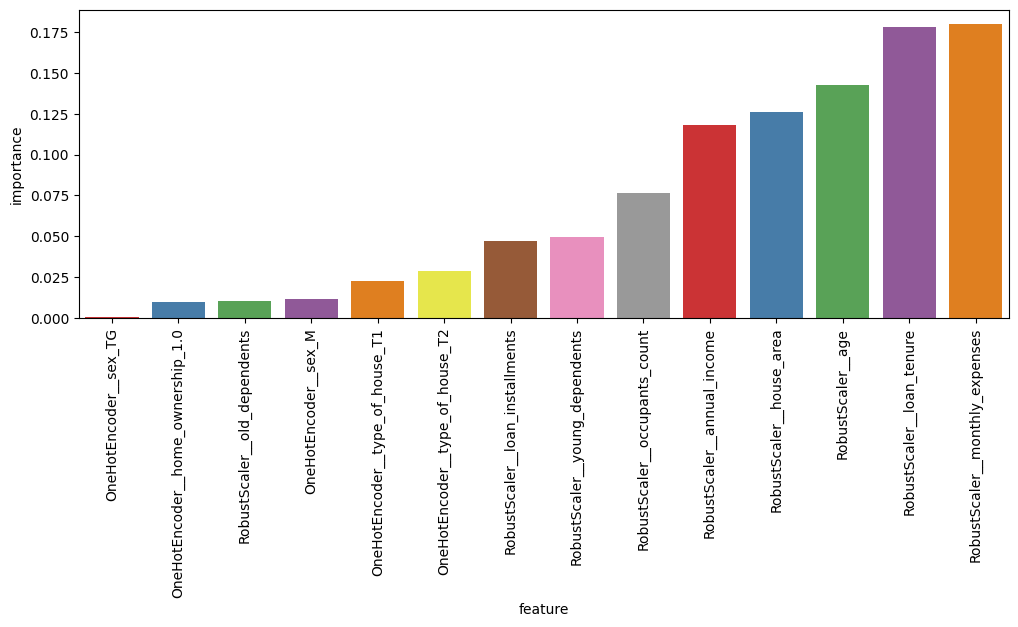

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data=feat_importances, x='feature', y='importance', palette='Set1')
plt.xticks(rotation=90)

plt.show()

In [ ]:
X_test = preprocessor.transform(X_test)

In [ ]:
test_data = pd.DataFrame(X_test, columns=column_names)
test_data.head()

,OneHotEncoder__sex_M,OneHotEncoder__sex_TG,OneHotEncoder__type_of_house_T1,OneHotEncoder__type_of_house_T2,OneHotEncoder__home_ownership_1.0,RobustScaler__age,RobustScaler__annual_income,RobustScaler__monthly_expenses,RobustScaler__old_dependents,RobustScaler__young_dependents,RobustScaler__occupants_count,RobustScaler__house_area,RobustScaler__loan_tenure,RobustScaler__loan_installments
0,0.0,0.0,0.0,1.0,1.0,-0.076923,-0.500000,0.0,0.0,-0.5,-0.50,-0.625,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.076923,0.500000,-0.5,0.0,0.5,0.50,0.375,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,-1.000000,0.555556,-0.5,0.0,0.5,0.50,2.780,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,-0.538462,0.388889,-1.3,0.0,-0.5,0.25,0.250,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.769231,0.000000,-0.5,0.0,0.5,0.00,0.375,0.0,0.0


#### Training

In [ ]:
# Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
def evaluate_model(true, predicted):
    mae = round(mean_absolute_error(true, predicted), 3)
    mape = round(mean_absolute_percentage_error(true, predicted), 3)
    mse = round(mean_squared_error(true, predicted), 3)
    rmse = round(np.sqrt(mean_squared_error(true, predicted)), 3)
    return mae, mape, mse, rmse

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    # "CatBoost Regressor": CatBoostRegressor(verbose=False),
}

In [ ]:
full_report = {}

for model_name in models:
    model_report = {}

    model = models[model_name]
    model.fit(train_data, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    model_report['predictions'] = y_test_pred

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mape, model_train_mse, model_train_rmse = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mape, model_test_mse, model_test_rmse = evaluate_model(y_test, y_test_pred)

    model_report['train_mae'] = model_train_mae
    model_report['train_mape'] = model_train_mape
    model_report['train_mse'] = model_train_mse
    model_report['train_rmse'] = model_train_rmse

    model_report['test_mae'] = model_test_mae
    model_report['test_mape'] = model_test_mape
    model_report['test_mse'] = model_test_mse
    model_report['test_rmse'] = model_test_rmse

    print('>>>', model_name)

    print('Model performance for Training set: ')
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_train_mape))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))

    print('----------------------------------')

    print('Model performance for Test set: ')
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_test_mape))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))

    print('\n')

    full_report[model_name] = model_report

>>> Linear Regression
Model performance for Training set: 
- Mean Absolute Error: 1032.7440
- Mean Absolute Percentage Error: 0.1870
- Mean Squared Error: 2192829.0710
- Root Mean Squared Error: 1480.8200
----------------------------------
Model performance for Test set: 
- Mean Absolute Error: 1024.4180
- Mean Absolute Percentage Error: 0.1850
- Mean Squared Error: 2074301.7280
- Root Mean Squared Error: 1440.2440


>>> Ridge
Model performance for Training set: 
- Mean Absolute Error: 1032.7300
- Mean Absolute Percentage Error: 0.1870
- Mean Squared Error: 2192832.2990
- Root Mean Squared Error: 1480.8210
----------------------------------
Model performance for Test set: 
- Mean Absolute Error: 1024.3940
- Mean Absolute Percentage Error: 0.1850
- Mean Squared Error: 2074303.0970
- Root Mean Squared Error: 1440.2440


>>> Lasso
Model performance for Training set: 
- Mean Absolute Error: 1032.4990
- Mean Absolute Percentage Error: 0.1870
- Mean Squared Error: 2192950.6810
- Root Mean Sq

#### Analysis:

In [ ]:
all_models = list(full_report.keys())
all_models

['Linear Regression',
 'Ridge',
 'Lasso',
 'K-Neighbors Regressor',
 'Decision Tree Regressor',
 'Random Forest Regressor',
 'AdaBoost Regressor',
 'XGBoost Regressor']

In [ ]:
true_and_predicted = {
    'true': y_test.values
}

In [ ]:
for model in all_models:
    true_and_predicted[model + '_prediction'] = full_report[model]['predictions']

In [ ]:
model_analysis = pd.DataFrame(true_and_predicted)
model_analysis.head(20)

,true,Linear Regression_prediction,Ridge_prediction,Lasso_prediction,K-Neighbors Regressor_prediction,Decision Tree Regressor_prediction,Random Forest Regressor_prediction,AdaBoost Regressor_prediction,XGBoost Regressor_prediction
0,5000.0,4992.664452,4993.079121,4995.146964,4800.0,5000.000000,4967.500000,6400.626741,5067.246582
1,5000.0,4882.869922,4884.958391,4900.777507,5000.0,5000.000000,5020.000000,6692.890995,4836.227051
2,5000.0,6176.770850,6176.093402,6171.028610,5000.0,5000.000000,5161.000000,6547.792706,4280.873047
3,5000.0,5244.055973,5244.014595,5246.126340,7000.0,7500.000000,6150.000000,6337.190083,5858.951172
4,7500.0,5547.505415,5547.337521,5540.962900,7000.0,7500.000000,7150.000000,6715.638451,7234.380371
5,5000.0,5564.322127,5564.354153,5561.917806,7500.0,5000.000000,5804.000000,6460.240275,5385.434570
6,5000.0,5355.095959,5355.261759,5358.046221,5000.0,5000.000000,5000.000000,6715.638451,4627.450195
7,5000.0,4872.287360,4872.439604,4873.917667,5000.0,5000.000000,4980.555556,4817.307692,4847.593262
8,8000.0,6257.123345,6256.651622,6250.628599,8000.0,8000.000000,8030.000000,6751.201569,8465.797852
9,5000.0,5674.091945,5673.641670,5671.120211,5500.0,5000.000000,5125.000000,5267.133956,5294.760742


In [ ]:
for model_prediction in model_analysis.columns[1:]:
    a_model = model_analysis[['true', model_prediction]]
    a_model['error_rate'] = 100*abs(a_model[model_prediction] - a_model['true'])/a_model['true']

    print(f"For {model_prediction}:")
    print(f" - mean true value = {round(a_model['true'].mean(), 2)}")
    print(f" - mean predicted value = {round(a_model[model_prediction].mean(), 2)}")
    print(f" - mean error rate = {round(a_model['error_rate'].mean(), 2)}")
    print(f" -> mean accuracy = {round(100 - a_model['error_rate'].mean(), 2)}")

    print('----------------------------------------')

    print(f" - median true value = {round(a_model['true'].median(), 2)}")
    print(f" - median predicted value = {round(a_model[model_prediction].median(), 2)}")
    print(f" - median error rate = {round(a_model['error_rate'].median(), 2)}")
    print(f" -> median accuracy = {round(100 - a_model['error_rate'].median(), 2)}")

    print('\n---------------------------------------------------------------')


For Linear Regression_prediction:
 - mean true value = 5647.87
 - mean predicted value = 5649.41
 - mean error rate = 18.51
 -> mean accuracy = 81.49
----------------------------------------
 - median true value = 5000.0
 - median predicted value = 5555.52
 - median error rate = 14.27
 -> median accuracy = 85.73

---------------------------------------------------------------
For Ridge_prediction:
 - mean true value = 5647.87
 - mean predicted value = 5649.43
 - mean error rate = 18.51
 -> mean accuracy = 81.49
----------------------------------------
 - median true value = 5000.0
 - median predicted value = 5555.19
 - median error rate = 14.27
 -> median accuracy = 85.73

---------------------------------------------------------------
For Lasso_prediction:
 - mean true value = 5647.87
 - mean predicted value = 5649.54
 - mean error rate = 18.51
 -> mean accuracy = 81.49
----------------------------------------
 - median true value = 5000.0
 - median predicted value = 5551.11
 - median

Looking at loss metrics and mean/median variation of difference b/w true & predicted across all models: **Random Forest Regressor** is the best one!

Let's do some **hyperparameter tuning** to obtain the best Randon Forest Regressor model:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 10],
    'max_features': [None, 'sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [10, 100],
    'random_state': [42]
}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', verbose=3)
grid_search.fit(train_data, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42;, score=-0.128 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42;, score=-0.127 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42;, score=-0.129 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42;, score=-0.130 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42;, score=-0.129 total time=   0.1s
[CV 1/5] END criterion=squared_er

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [10, 100],
                         'random_state': [42]},
             scoring='neg_mean_absolute_percentage_error', verbose=3)

In [ ]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 42}


In [ ]:
best_estimator = grid_search.best_estimator_

In [ ]:
best_estimator_preds_train_data = best_estimator.predict(train_data)
best_estimator_preds_test_data = best_estimator.predict(test_data)

In [ ]:
# Evaluate Train and Test dataset
model_train_mae, model_train_mape, model_train_mse, model_train_rmse = evaluate_model(y_train, best_estimator_preds_train_data)
model_test_mae, model_test_mape, model_test_mse, model_test_rmse = evaluate_model(y_test, best_estimator_preds_test_data)

In [ ]:
print('Best Estimator performance for Training set: ')
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- Mean Absolute Percentage Error: {:.4f}".format(model_train_mape))
print("- Mean Squared Error: {:.4f}".format(model_train_mse))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))

print('----------------------------------')

print('Best Estimator performance for Test set: ')
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- Mean Absolute Percentage Error: {:.4f}".format(model_test_mape))
print("- Mean Squared Error: {:.4f}".format(model_test_mse))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))

Best Estimator performance for Training set: 
- Mean Absolute Error: 754.1680
- Mean Absolute Percentage Error: 0.1220
- Mean Squared Error: 2336573.7760
- Root Mean Squared Error: 1528.5860
----------------------------------
Best Estimator performance for Test set: 
- Mean Absolute Error: 768.3270
- Mean Absolute Percentage Error: 0.1250
- Mean Squared Error: 2269981.5160
- Root Mean Squared Error: 1506.6460
